<a href="https://colab.research.google.com/github/eziong/MachineLearning02/blob/master/Assignment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


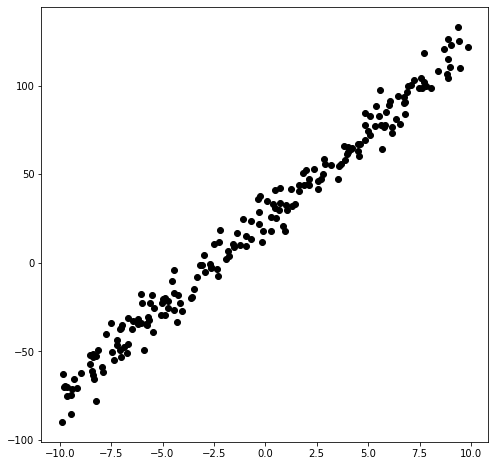

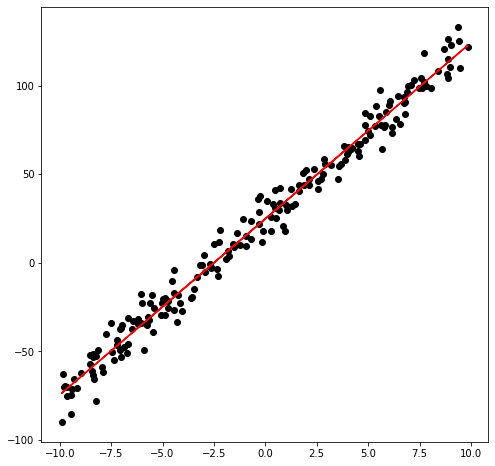

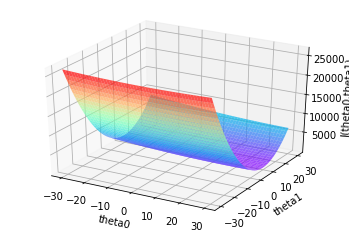

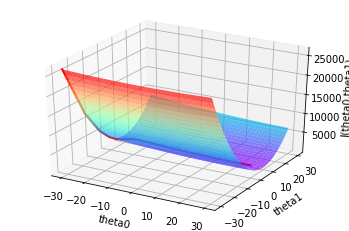

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('gdrive')

path = "/content/gdrive/My Drive/Colab Notebooks/data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

# input points 출력
plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, color='k')
plt.show()

###
# Assignment02로부터 불러옴
# learning_rate 수정
###

learning_rate = 1e-2 # 학습률

errors0 = [] # 경사하강법에서 기울기 변화율에 비례하는 값을 저장
errors1 = [] # while문(learning loop) 종료조건으로 활용
             # 최근 두 개의 errors값을 비교 후 종료

theta0=-30 # theta0 생성
theta1=-30 # theta1 생성

etheta0 = np.arange(-30,30,0.1)
etheta1 = np.arange(-30,30,0.1)
Etheta0,Etheta1 = np.meshgrid(etheta0,etheta1)



R_theta0 = []
R_theta1 = []
R_J = []

# Learning loop
while True:
  R_theta0.append(theta0)
  R_theta1.append(theta1)
  tmp0=0 # theta0의 값에 직접 저장하기 전에 임시 저장, 목적함수의 미분값
  tmp1=0 # theta1의 값에 직접 저장하기 전에 임시 저장, 목적함수의 미분값
  j=0

  # 경사하강법 Loop, 목적함수의 미분값 계산 
  for i in range(len(x_data)):
    tmp0+=learning_rate*(theta0+theta1*x_data[i]-y_data[i])/len(x_data)
    tmp1+=learning_rate*x_data[i]*(theta0+theta1*x_data[i]-y_data[i])/len(x_data)

  # 계산된 목적함수의 미분값을 theta0과 theta1에 대입
  theta0-=tmp0
  theta1-=tmp1
  # errors 리스트에 tmp에 해당하는 값을 append
  errors0.append(tmp0)
  errors1.append(tmp1)
  
  latest = len(errors0) - 1

  # 최근 두 개의 errors0 또는 errors1의 값이 반올림해서 같으면 충분히 학습된 것으로 판단 => Loop 종료
  if(latest>2 and ((round(errors0[latest],7)==round(errors0[latest-1],7))or(round(errors1[latest],7)==round(errors1[latest-1],7)))):
    break;
  # Loop가 진행중이라면 현재 learning 횟수와 각각의 theta 값을 출력, 해당 값의 직선(plt.show())
  #else:
    #print("|   %.4d   | %f | %f |"%(len(errors0),theta0,theta1))

# Learning Loop를 끝내고 나온 결과
y = theta0 +theta1*x_data
J=0

for i in range(len(x_data)):
  J += (Etheta0 + Etheta1 * x_data[i] - y_data[i]) ** 2
J /= (2*len(x_data))


for a,b in zip(R_theta0,R_theta1):
  rj=0
  for i in range(len(x_data)):
    rj += (a + b * x_data[i] - y_data[i]) ** 2
  rj /= (2*len(x_data))
  R_J.append(rj)


# 그래프 생성
# linear regression result 출력
plt.figure(figsize=(8,8))
plt.scatter(x_data, y_data, color='k')
plt.plot(x_data,y,'r')
plt.show()

# Plot the energy surface
fig=plt.figure() 
ax = fig.gca(projection='3d')
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('J(theta0,theta1)')
ax.plot_surface(Etheta0,Etheta1,J,color='b',alpha=0.7,cmap='rainbow')
plt.show()

# Plot the gradient descent path on the energy surface
fig=plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('J(theta0,theta1)')
ax.plot(R_theta0,R_theta1,R_J,color='r',linewidth=2.0)
ax.plot_surface(Etheta0,Etheta1,J,color='b',alpha=0.7,cmap='rainbow')
plt.show()
